In [22]:
import pandas as pd
df=pd.read_csv('housing.csv',delimiter=",", header=None, names=['land_zoned','b','c','d','e','f','g','h','i','tax','k','l','m','n'])
df.head(2)

,land_zoned,b,c,d,e,f,g,h,i,tax,k,l,m,n
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [25]:
# df.corr()

In [26]:
df=df[['land_zoned','tax']]
df.head()

,land_zoned,tax
0,0.00632,296.0
1,0.02731,242.0
2,0.02729,242.0
3,0.03237,222.0
4,0.06905,222.0


In [99]:
import math
def covariance(x,xmean,y,ymean):
    cov=0
    x=list(x)
    y=list(y)
    for i in range(len(x)):
#         print(x[i])
#         print("Value of i: ",i," ",x[i]," ",y[i])
        cov+=((x[i]-xmean)*(y[i]-ymean))
    print("Covariance: ",round(cov,4))
    return round(cov,4)

def var(x,mean):
    x=list(x)
    return sum([(x[i]-mean)**2 for i in range(len(x))])

def mean(x):
    return sum(x)/len(x)

def predict(b0,b1,x):
    x=list(x)
    y=[b0+ b1*x[i] for i in range(len(x))]
    return y

def cal_coef(x,y):
    b1=covariance(x,mean(x),y,mean(y))/var(x,mean(x))
    print("Value of b1: ",b1)
    b0=mean(y) - b1*mean(x)
    return b0,b1

def rmse(y,ypred):
    y=list(y)
    se=sum([(y[i]-ypred[i])**2 for i in range(len(y))])
    mse=se/len(y)
    return math.sqrt(mse)
    
    

In [112]:
from sklearn.model_selection import train_test_split
x=df['land_zoned']
y=df['tax']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# X_train = sc.fit_transform(x_train)
# X_test = sc.transform(x_test)


In [105]:
b0,b1=cal_coef(x_train,y_train)
print(b0)


Covariance:  305582.3624
Value of b1:  10.05171383920097
375.14727534530425


In [106]:
y_pred=predict(b0,b1,x_train)


In [107]:
rmse=rmse(y_train,y_pred)

In [108]:
print("rmse: ",rmse)

rmse:  141.69772084290975


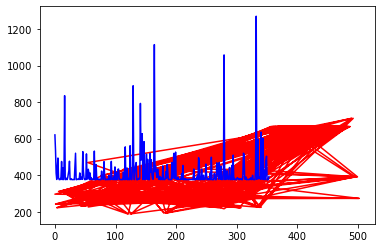

In [110]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(y_train, color='red')
plt.plot(y_pred, color='blue')
plt.show()

In [234]:
#Multivariate regression
def updated_coef(x_train,l_rate):
    coef=[0.0 for i in range(len(list(x_train.columns)))]
    sum_err=0
#     x_train=list(x_train)
#     y_train=list(y_train)
    for idx,row in x_train.iterrows():
#         print(row[0])
        yhat=predict(row,row[-1],coef)
        print(yhat," ", row[-1])
        error=(row[-1]-yhat)**2
        sum_err+=error
        coef[0]+=l_rate*error*yhat*(1.0-yhat)
        for j in range(1,len(coef)):
            coef[j]+=l_rate*error*yhat*(1.0-yhat)*row[j-1]
    return coef



In [246]:
import math
def predict(x_train,y_train,coef):
    yhat=coef[0]
#     print(x_train)
    for i in range(1,len(coef)):
#         print(x_train)
        yhat+=x_train[i-1]*coef[i]
    return round((1.0 / (1.0 + math.exp(-yhat))),3)

In [247]:
import pandas as pd
df=pd.read_csv('housing.csv',delimiter=",",header=None)
df=pd.read_csv('housing.csv',delimiter=",",header=None, names=['land_zoned','b','c','d','e','f','g','h','i','tax','k','l','m','n'],skiprows=3)


df.head(5)

,land_zoned,b,c,d,e,f,g,h,i,tax,k,l,m,n
0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
1,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
2,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
3,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
4,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,/19.15,27.1


In [248]:
df=df[['land_zoned','b','c','tax']]
df.head(2)


,land_zoned,b,c,tax
0,0.03237,0.0,2.18,222.0
1,0.06905,0.0,2.18,222.0


In [249]:
from sklearn.model_selection import train_test_split
x=df[['land_zoned','b','c']]
y=df['tax']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [250]:
coefs=updated_coef(df,0.0001)
print(coefs)

0.5   222.0
0.999   222.0
0.999   222.0
1.0   311.0
1.0   311.0
1.0   311.0
1.0   311.0
1.0   311.0
1.0   311.0
1.0   311.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   307.0
1.0   279.0
1.0   279.0
1.0   279.0
1.0   279.0
1.0   252.0
1.0   252.0
1.0   233.0
1.0   233.0
1.0   233.0
1.0   233.0
1.0   233.0
1.0   233.0
1.0   233.0
1.0   233.0
1.0   233.0
1.0   243.0
1.0   243.0
1.0   243.0
1.0   243.0
1.0   469.0
0.989   226.0
1.0   313.0
1.0   256.0
1.0   284.0
1.0   284.0
1.0   284.0
1.0   284.0
1.0   284.0
1.0   284.0
1.0   216.0
1.0   337.0
1.0   337.0
1.0   345.0
1.0   345.0
1.0   345.0
1.0   305.0
1.0   305.0
1.0   305.0
1.0   305.0
1.0   398.0
1.0   398.0
1.0   398.0
1.0   398.0
1.0   398.0
1.0   398.0
1.0   281.0
1.0   281.0
1.0   281.0
1.0   281.0
1.0   247.0
1.0   247.

In [253]:
#Line of regression
input= [10, 15, 3, 7] 
k=19
lst=[]
for i in input:
    if i in lst:
        print("True")
    lst.append(k-i)
print("false")

false


In [316]:
import pandas as pd
df=pd.read_csv('CaliHousing.csv')


df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


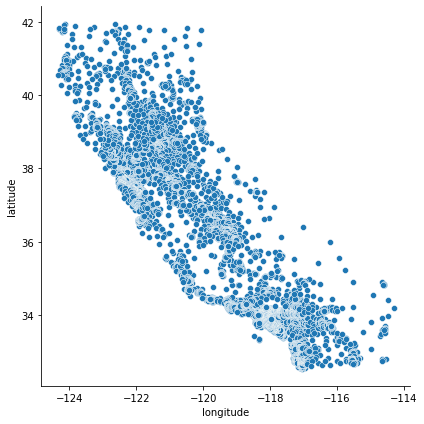

In [260]:
import seaborn as sns
sns.relplot(
    x=df["longitude"], y=df["latitude"], data=df, height=6,
);

In [276]:
df_desc=df.describe()
df_desc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [270]:
df_desc.loc["mean"][1]

35.6318614341087

In [277]:
# centroids=[[df_desc.loc["25%"][0:2]],[df_desc.loc["mean"][0:2]],[df_desc.loc["75%"][0:2]]]
# print(centroids[1])
centroids=[[-121.80,33.93],[-118.49,34.26],[-118.01,37.71]]
centroids

[[-121.8, 33.93], [-118.49, 34.26], [-118.01, 37.71]]

In [317]:
#Fitting model
df=df[["longitude","latitude"]]
df.head(2)

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86


In [298]:
import math
def calculate_distance(row,c):
    return math.sqrt(((row["longitude"]-c[0])**2) +((row["latitude"]-c[1])**2))

In [332]:
cnt=0
for idx,row in df.iterrows():
    min_dist=999999
    cluster=0
    for c in range(len(centroids)):
#         print(row["longitude"]," ",row["latitude"])
#         print(centroids[c]," ",c)
        dist=calculate_distance(row,centroids[c])
#         print("distance: ",dist," min_dist: ",min_dist)
        if dist< min_dist:
            min_dist=dist
            cluster=c
    
    if cluster==1:
#         print("there is one")
        cnt+=1
    df.at[idx,'cluster'] = cluster
print(cnt)
df.head(3)

11617


,longitude,latitude,cluster
0,-122.23,37.88,0
1,-122.22,37.86,0
2,-122.24,37.85,0


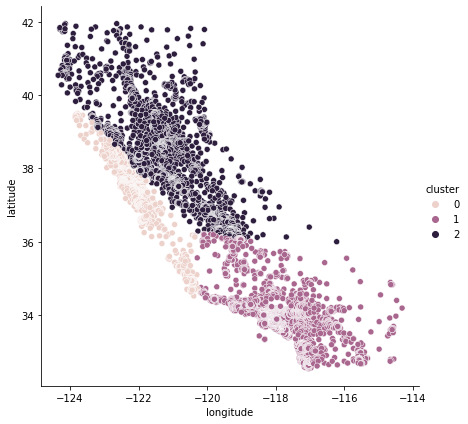

In [336]:
sns.relplot(
    x=df["longitude"], y=df["latitude"], hue=df["cluster"], data=df, height=6,
);

In [357]:
#update clusters
for c in range(len(centroids)):
    centroids[c][0]=df[df["cluster"]==c]["longitude"].mean()
    centroids[c][1]=df[df["cluster"]==c]["latitude"].mean()
    
print(centroids)

[[-122.08166077217732, 38.141772767462214], [-117.95850077679967, 33.88045140687043], [-120.28455026455059, 37.06906525573203]]


In [360]:
for idx,row in df.iterrows():
    min_dist=999999
    cluster=0
    for c in range(len(centroids)):
#         print(row["longitude"]," ",row["latitude"])
#         print(centroids[c]," ",c)
        dist=calculate_distance(row,centroids[c])
#         print("distance: ",dist," min_dist: ",min_dist)
        if dist< min_dist:
            min_dist=dist
            cluster=c
    
    if cluster==1:
#         print("there is one")
        cnt+=1
    df.at[idx,'cluster'] = cluster

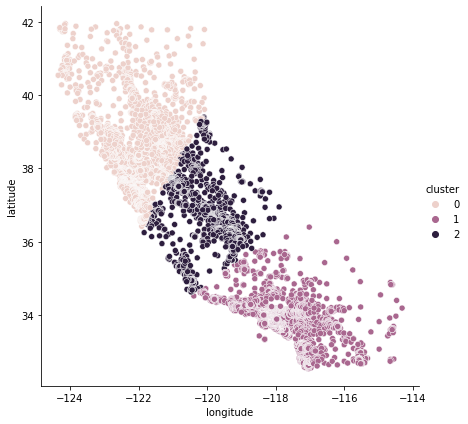

In [361]:
sns.relplot(
    x=df["longitude"], y=df["latitude"], hue=df["cluster"], data=df, height=6,
);

In [362]:
len(df[df["cluster"]==1])

11488

In [365]:
import pandas as pd
app_train=pd.read_csv('application_train.csv')
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [378]:
app_train[app_train["SK_ID_CURR"]==380361].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
242164,380361,0,Cash loans,F,Y,Y,0,315000.0,450000.0,11871.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [369]:
b_bal=pd.read_csv("bureau_balance.csv")
b_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [372]:
b_bal[b_bal["SK_ID_BUREAU"]==5715448].head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [374]:
b_bal.STATUS.unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

In [375]:
b=pd.read_csv("bureau.csv")
b.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [382]:
b[b["SK_ID_CURR"]==380361].head(20)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
768,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0
769,380361,5715449,Active,currency 1,-357,0,1119.0,NaN,NaN,0,45000.0,0.0,45000.0,0.0,Credit card,-130,2691.0
770,380361,5715451,Closed,currency 1,-917,0,-187.0,-759.0,NaN,0,74439.0,0.0,0.0,0.0,Consumer credit,-748,0.0
771,380361,5715452,Closed,currency 1,-993,0,31039.0,-831.0,NaN,0,315000.0,0.0,0.0,0.0,Credit card,-818,0.0
772,380361,5715453,Closed,currency 1,-1146,0,681.0,-780.0,NaN,0,2025000.0,0.0,0.0,0.0,Consumer credit,-769,0.0
773,380361,5715454,Closed,currency 1,-1622,0,-1074.0,-1073.0,NaN,0,540000.0,0.0,0.0,0.0,Consumer credit,-1006,0.0
774,380361,5715455,Closed,currency 1,-2631,0,-804.0,-1096.0,NaN,0,2205000.0,0.0,0.0,0.0,Car loan,-944,NaN
775,380361,5715456,Closed,currency 1,-1449,0,-1084.0,-1267.0,NaN,0,60480.0,0.0,0.0,0.0,Consumer credit,-1259,NaN
776,380361,5715457,Active,currency 1,-222,0,874.0,NaN,NaN,0,202500.0,31594.5,0.0,0.0,Credit card,-18,0.0
777,380361,5715458,Closed,currency 1,-749,0,-111.0,-110.0,NaN,0,1267843.5,0.0,NaN,0.0,Consumer credit,-110,0.0


In [383]:
import pandas as pd
app_train=pd.read_csv('Mall_customers.csv.xls')
app_train.head(5)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [384]:
app_train.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


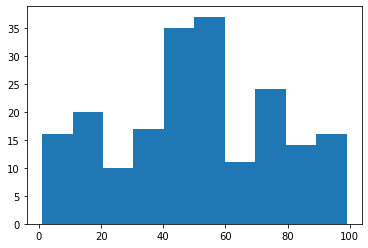

In [386]:
import matplotlib.pyplot as plt
plt.hist(app_train['Spending_Score'])
plt.show()

In [396]:
from scipy.stats import shapiro
pval=shapiro(app_train['Spending_Score'])
pval

ShapiroResult(statistic=0.9694606065750122, pvalue=0.0002422899124212563)

In [393]:
#That means data is not normal
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
mm=ms.fit_transform(app_train[["Spending_Score"]])
X = pd.DataFrame(mm, columns=["Spending_Score"])

In [572]:
for idx,row in app_train.iterrows():
    app_train.at[idx,"Spending_Score"]=math.log(row["Spending_Score"])

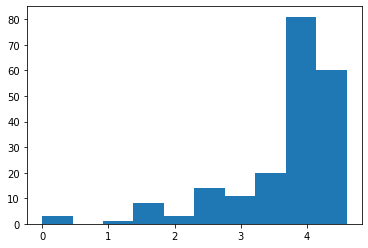

In [573]:
#That means data is not normal
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
mm=ms.fit_transform(app_train[["Spending_Score"]])
X = pd.DataFrame(mm, columns=["Spending_Score"])
plt.hist(app_train['Spending_Score'])
plt.show()

In [397]:
app_train.head(5)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [404]:
for idx,row in app_train.iterrows():
    app_train.at[idx,"Genre"]=0 if row["Genre"]=="Male" else 1

In [405]:
app_train.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1.0,0,19.0,15.0,39.0
1,2.0,0,21.0,15.0,81.0
2,3.0,1,20.0,16.0,6.0
3,4.0,1,23.0,16.0,77.0
4,5.0,1,31.0,17.0,40.0


In [417]:
wine=pd.read_csv("wine_data.csv")
print(wine.columns)
wine.drop("Unnamed: 0",axis=1,inplace=True)
wine.head()

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [424]:
wine[wine["variety"]=="Tinta de Toro"].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
22,Spain,Tarry blackberry and cheesy oak aromas are app...,Termanthia,95,220.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia


In [419]:
wine.corr()

,points,price
points,1.000000,0.459863
price,0.459863,1.000000


In [423]:
len(wine.designation.unique())

30622

In [421]:
len(wine)

150930

In [554]:
loan=pd.read_csv("loan_eligibility.csv.xls")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [555]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [556]:
mean_val=loan["LoanAmount"].mean()
loan['LoanAmount'].fillna(value=mean_val, inplace=True)
loan.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [557]:
loan["Loan_Amount_Term"].bfill(inplace=True)
loan["Dependents"].bfill(inplace=True)

In [558]:
loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [559]:
loan.Dependents.unique()


array(['0', '1', '2', '3+'], dtype=object)

In [560]:
for idx,row in loan.iterrows():
#     if row["Dependents"] not in ['1','2','0']:
#         print(row["Dependents"])
    loan.at[idx,"Dependents"]="3" if row["Dependents"]=="3+" else row["Dependents"]
    loan.at[idx,"LoanAmount"]=int(row["LoanAmount"])

In [561]:
data=pd.get_dummies(loan,columns=["Gender","Married","Education","Dependents","Property_Area","Self_Employed"])
data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
0,LP001002,5849,0.0,146.0,360.0,1.0,Y,0,1,1,...,0,1,0,0,0,0,0,1,1,0
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,0,1,0,...,0,1,0,0,0,0,0,1,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,...,1,1,0,0,0,0,0,1,1,0
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,0,1,1,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,Y,1,0,1,...,0,1,0,0,0,1,0,0,1,0
610,LP002979,4106,0.0,40.0,180.0,1.0,Y,0,1,0,...,0,0,0,0,1,1,0,0,1,0
611,LP002983,8072,240.0,253.0,360.0,1.0,Y,0,1,0,...,0,0,1,0,0,0,0,1,1,0
612,LP002984,7583,0.0,187.0,360.0,1.0,Y,0,1,0,...,0,0,0,1,0,0,0,1,1,0


In [562]:
data.LoanAmount.unique()

array([146., 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [563]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# loan["Gender"]=le.fit_transform(loan["Gender"])
# loan["Married"]=le.fit_transform(loan["Married"])
# loan["Education"]=le.fit_transform(loan["Education"])
# loan["Self_Employed"]=le.fit_transform(loan["Self_Employed"])
# loan["Property_Area"]=le.fit_transform(loan["Property_Area"])
# loan["Dependents"].bfill(inplace=True)

In [566]:
# data.drop("Loan_ID", axis=1, inplace=True)
# data.drop("CoapplicantIncome",axis=1, inplace=True)
data.dropna(inplace=True)
X=data.drop("Loan_Status", axis=1)
Y=data["Loan_Status"]
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X,Y)

#
y_pred=logreg.predict(X)

In [571]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y, y_pred)
print(cnf_matrix)
accuracy=metrics.accuracy_score(Y,y_pred)
print(accuracy)

[[ 82  97]
 [  7 378]]
0.8156028368794326
